<a href="https://colab.research.google.com/github/sikha2552/Towards_Data_science_Blog1/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Image Processing Using Skimage (Part 2)**

In [ ]:
import matplotlib.pyplot as plt 


Low Contrast/ High Contrast images


In [ ]:
def show_out(im,outim,title_text):
  fig,ax=plt.subplots(nrows=1, ncols=2)
  ax[0].imshow(im,cmap='gray')
  ax[0].set_title("Original Image")
  ax[1].imshow(outim,cmap='gray')
  ax[1].set_title(title_text)
  for a in ax:
    a.axis('off')

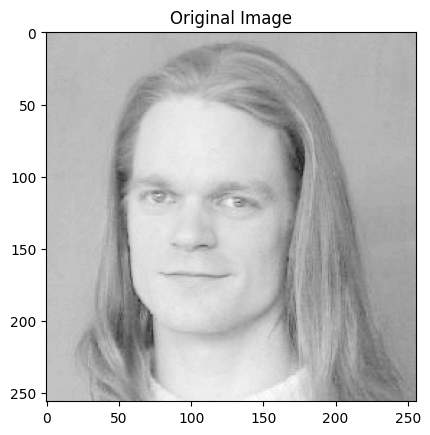

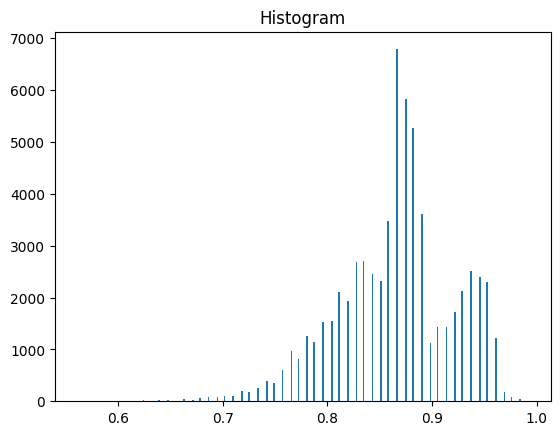

In [ ]:
from skimage.color import rgb2gray
#1. Read a low contrast image
low=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/low_contrast1.png')
low=low[:,:,:3]
# Convert the image to gray using rgb2gray()
low_gray=rgb2gray(low)
#3. Plot histogram
plt.imshow(low_gray,cmap='gray')
plt.title("Original Image")
plt.show()
plt.hist(low_gray.ravel(),bins=256)
plt.title("Histogram")
plt.show()

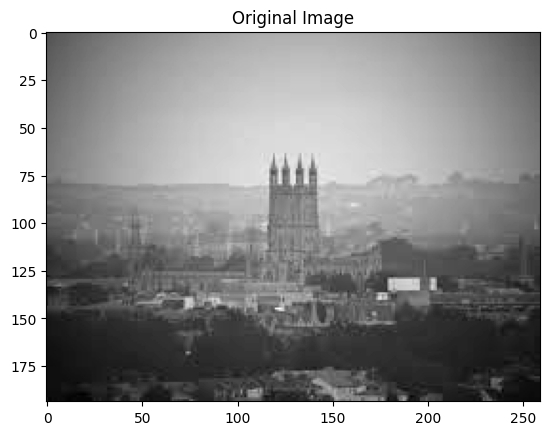

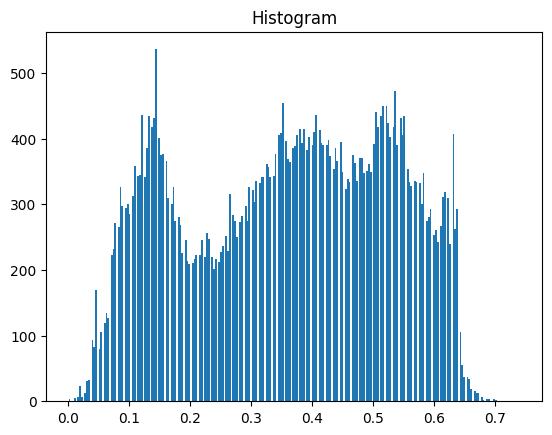

In [ ]:
import numpy as np
#1. Read a low contrast image
high=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/high_contrast1.jpg')
# Convert the image to gray using rgb2gray()
high_gray=rgb2gray(high)
#3. Plot histogram
plt.imshow(high_gray,cmap='gray')
plt.title("Original Image")
plt.show()
plt.hist(high_gray.ravel(),bins=256)
plt.title("Histogram")
plt.show()


In [ ]:

min=np.min(low_gray)
max=np.max(low_gray)
print("The minimum intensity of low contrast image is : {} and the maximim intesity of low contrast image is : {}".format(min,max))

The minimum intensity of low contrast image is : 0.5607843399047852 and the maximim intesity of low contrast image is : 0.9921568632125854


In [ ]:
min=np.min(high_gray)
max=np.max(high_gray)
print("The minimum intensity of high contrast image is : {} and the maximim intesity of high contrast image is : {}".format(min,max))

The minimum intensity of high contrast image is : 0.0005654901960784314 and the maximim intesity of high contrast image is : 0.7409086274509804


Histogram Equalization

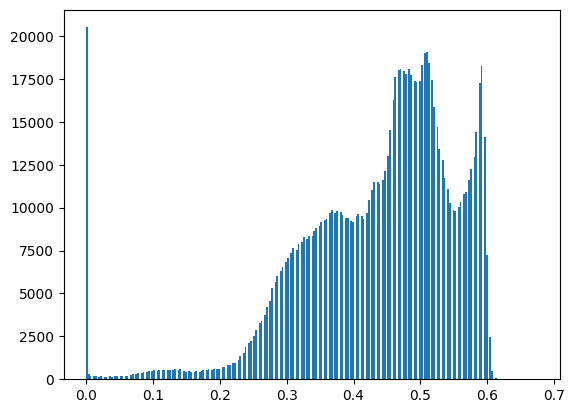

In [ ]:
from skimage import exposure
chest=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/chest.png')
#Plot histogram
his=plt.hist(chest.ravel(),bins=256)
plt.show()

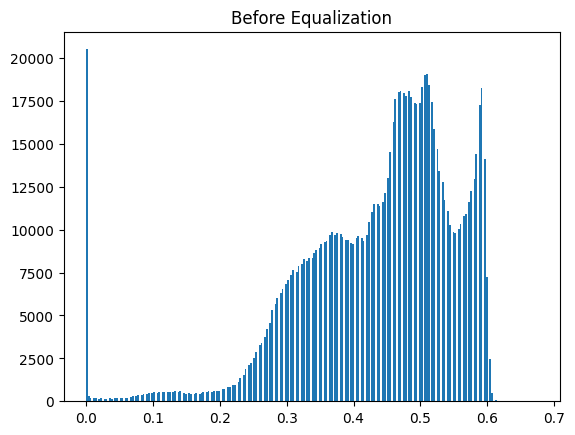

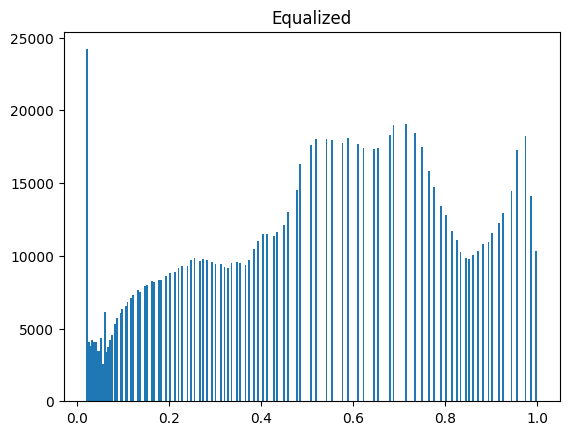

In [ ]:
eq_chest=exposure.equalize_hist(chest)
# Display the two histograms
his=plt.hist(chest.ravel(),bins=256)
plt.title('Before Equalization')
plt.show()
hist_e=plt.hist(eq_chest.ravel(),bins=256)
plt.title('Equalized')
plt.show()

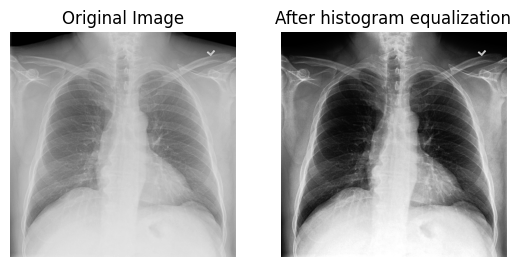

In [ ]:
show_out(chest,eq_chest,'After histogram equalization')


Contrast Limited Adaptive Histogram Equalization (CLAHE)

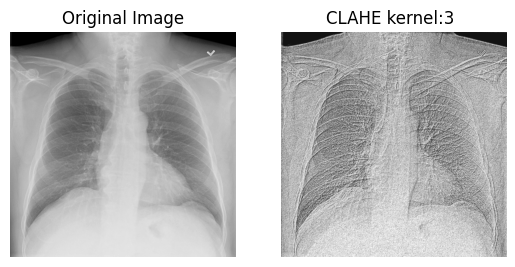

In [ ]:
from skimage import exposure
adpt_equalize=exposure.equalize_adapthist(chest,kernel_size=3,clip_limit=0.03)
show_out(chest,adpt_equalize,'CLAHE kernel:3 ')


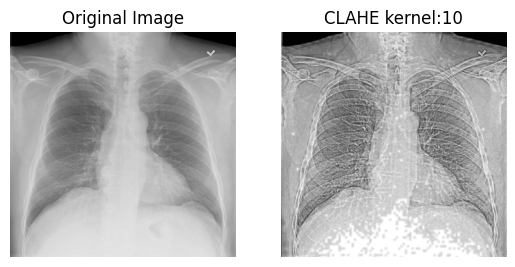

In [ ]:
from skimage import exposure
adpt_equalize2=exposure.equalize_adapthist(chest,kernel_size=10,clip_limit=0.03)
show_out(chest,adpt_equalize2,'CLAHE kernel:10')

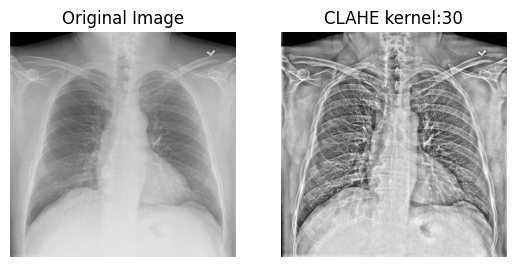

In [ ]:
from skimage import exposure
adpt_equalize3=exposure.equalize_adapthist(chest,kernel_size=30,clip_limit=0.03)
show_out(chest,adpt_equalize3,'CLAHE kernel:30')

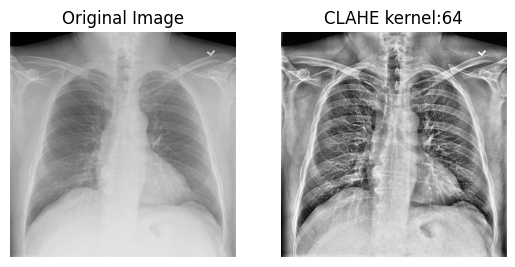

In [ ]:
from skimage import exposure
adpt_equalize4=exposure.equalize_adapthist(chest,kernel_size=64,clip_limit=0.03)
show_out(chest,adpt_equalize4,'CLAHE kernel:64')

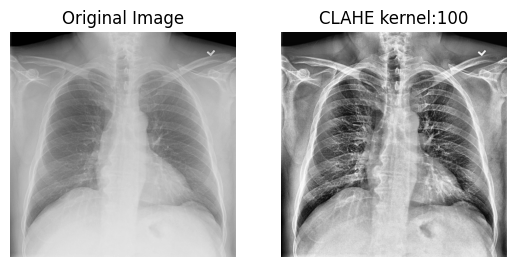

In [ ]:
from skimage import exposure
adpt_equalize5=exposure.equalize_adapthist(chest,kernel_size=100,clip_limit=0.03)
show_out(chest,adpt_equalize5,'CLAHE kernel:100')

(-0.5, 1023.5, 1023.5, -0.5)

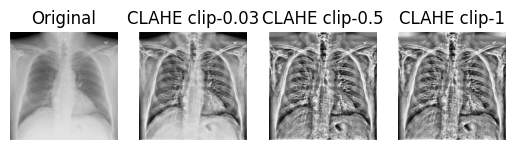

In [ ]:
from skimage import exposure
adpt_equalize4=exposure.equalize_adapthist(chest,kernel_size=64,clip_limit=0.03)
adpt_equalize5=exposure.equalize_adapthist(chest,kernel_size=64,clip_limit=0.5)
adpt_equalize6=exposure.equalize_adapthist(chest,kernel_size=64,clip_limit=1)
plt.subplot(141)
plt.imshow(chest,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(142)
plt.imshow(adpt_equalize4,cmap='gray')
plt.title('CLAHE clip-0.03')
plt.axis('off')
plt.subplot(143)
plt.imshow(adpt_equalize5,cmap='gray')
plt.title('CLAHE clip-0.5')
plt.axis('off')
plt.subplot(144)
plt.imshow(adpt_equalize6,cmap='gray')
plt.title('CLAHE clip-1')
plt.axis('off')
#show_out(chest,adpt_equalize4,'CLAHE kernel:clip-0.03')

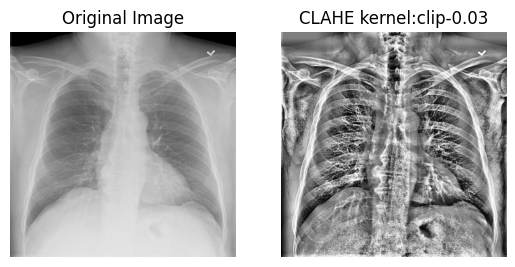

In [ ]:
adpt_equalize5=exposure.equalize_adapthist(chest,kernel_size=64,clip_limit=0.5)
show_out(chest,adpt_equalize5,'CLAHE kernel:clip-0.03')

Contrast Stretching

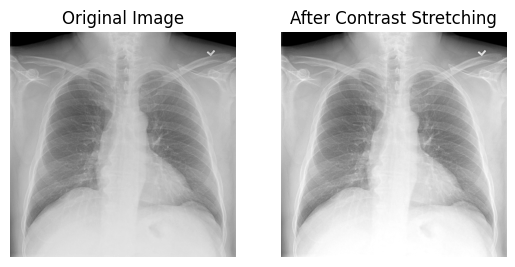

In [ ]:
p2, p99 = np.percentile(chest, (2, 99))
chest_contrast_stretch=exposure.rescale_intensity(chest,in_range=(p2,p99))
show_out(chest,chest_contrast_stretch,'After Contrast Stretching')

In [ ]:
p2

0.007843137718737125

In [ ]:
p99

0.5960784554481506

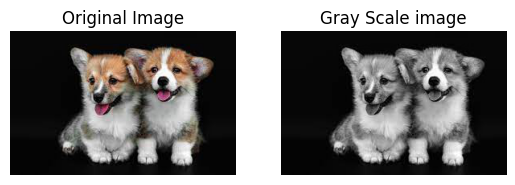

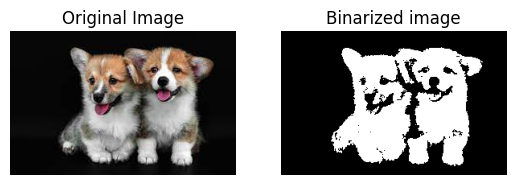

In [ ]:
from skimage import color
dog=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/dog.jpg')
dog_gray=color.rgb2gray(dog)
show_out(dog,dog_gray,'Gray Scale image')
from skimage.filters import threshold_otsu
Th=threshold_otsu(dog_gray)
binary=dog_gray>Th
show_out(dog,binary,'Binarized image')


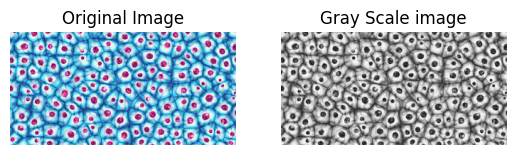

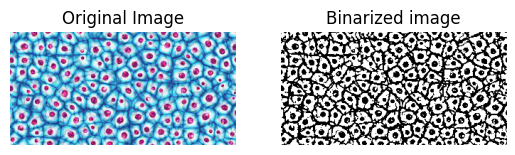

In [ ]:
from skimage.filters import threshold_local
cells=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/cells.jpg')
cells_gray=color.rgb2gray(cells)
show_out(cells,cells_gray,'Gray Scale image')
block=15;
threshlocal=threshold_local(cells_gray,block,offset=0)
binary_local=cells_gray>threshlocal
#showimage(binary_local1,'Localbinarization','gray')
show_out(cells,binary_local,'Binarized image')


In [ ]:
threshlocal1=threshold_local(cells_gray,block,offset=0)
binary_local1=cells_gray>threshlocal1
threshlocal2=threshold_local(cells_gray,block,offset=0.2)
binary_local2=cells_gray>threshlocal2
threshlocal3=threshold_local(cells_gray,block,offset=0.5)
binary_local3=cells_gray>threshlocal3
threshlocal4=threshold_local(cells_gray,block,offset=0.8)
binary_local4=cells_gray>threshlocal4

(-0.5, 317.5, 158.5, -0.5)

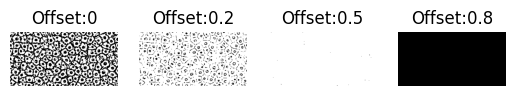

In [ ]:
plt.subplot(141)
plt.imshow(binary_local1,cmap='gray')
plt.title("Offset:0")
plt.axis('off')
plt.subplot(142)
plt.imshow(binary_local2,cmap='gray')
plt.title("Offset:0.2")
plt.axis('off')
plt.subplot(143)
plt.imshow(binary_local3,cmap='gray')
plt.title("Offset:0.5")
plt.axis('off')
plt.subplot(144)
plt.imshow(binary_local4,cmap='gray')
plt.title("Offset:0.8")
plt.axis('off')

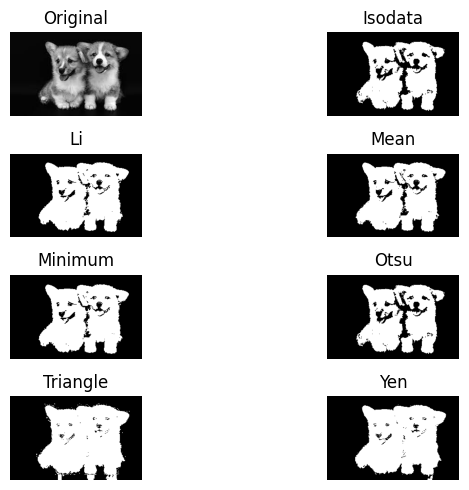

In [ ]:
fruits_image=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/dog.jpg')
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

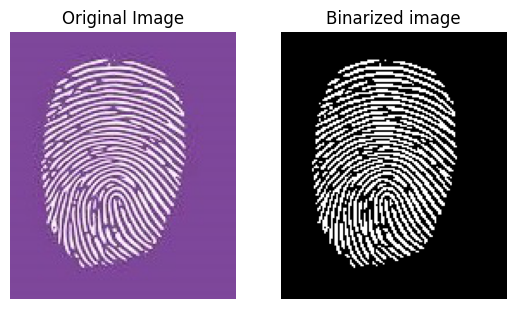

In [ ]:
from skimage import morphology
from skimage.filters import threshold_otsu
from skimage import color
finger_image=plt.imread('/content/drive/MyDrive/MY_Learnings/BLOGS/Part2/fing.jpg')
fing_gray=color.rgb2gray(finger_image)
Th=threshold_otsu(fing_gray)
binary=fing_gray>Th
show_out(finger_image,binary,'Binarized image')



(155, 131)


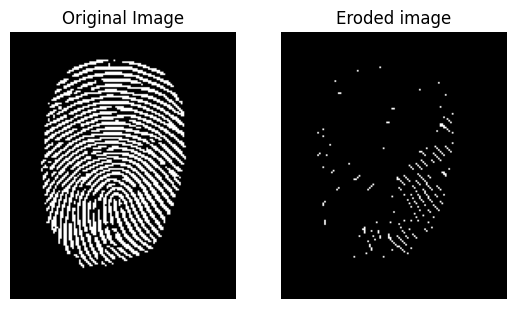

In [ ]:
#Erosion
from skimage import morphology
eroded = morphology.binary_erosion(binary)
print(eroded.shape)
show_out(binary,eroded,'Eroded image')

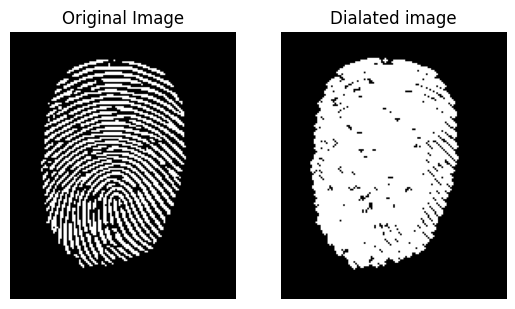

In [ ]:
dialated=morphology.binary_dilation(binary)
show_out(binary,dialated,'Dialated image')